# 의사결정나무(Decision Tree)

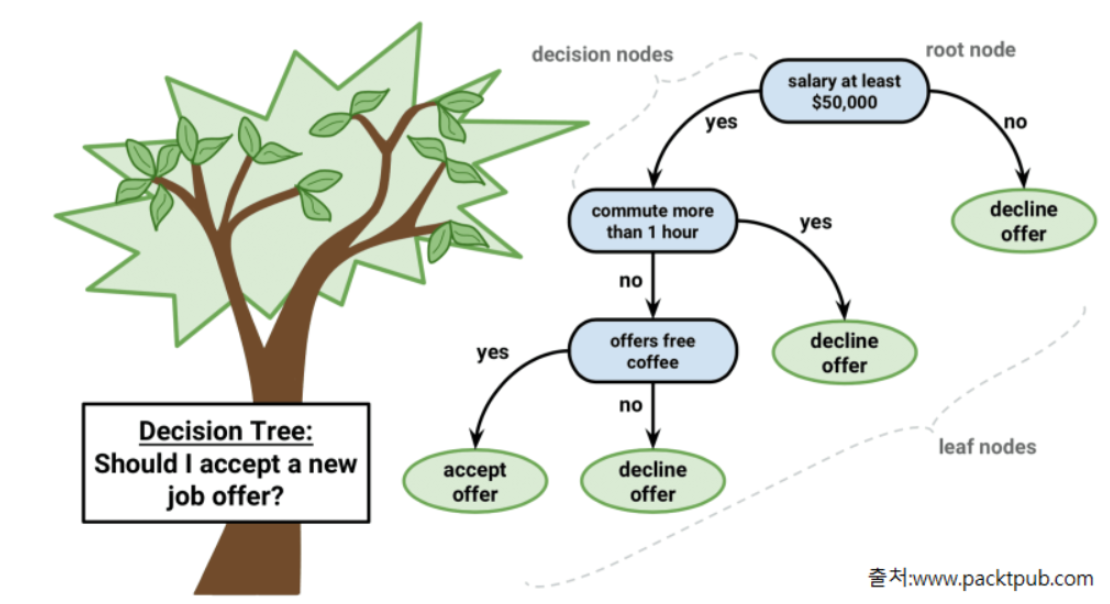

## 개요

- 데이터를 잘 분류할 수 있는 질문을 던져가며 대상을 좁혀가는 '스무고개'와 비슷한 형식의 알고리즘
- 분기해 나가는 구조가 Tree 구조와 같기 때문에 Decision Tree 라고 함
    - 불순도 최소화하는 방향으로 조건 만들어 학습 진행
    - 하위 노드는 yes/no 2개로 분기

- 머신러닝 모델들 중 몇 안되는 White box 모델로 결과에 대한 해석 가능
- 과대적합(Overfitting) 발생하기 쉬움
- 앙상블 기반 알고리즘인 랜덤 포레스트와 많은 부스팅(Boosting)기반 앙상블 모델들의 기반 알고리즘으로 사용됨

> ### 순도(purity)/불순도(impurity)
>    - 서로 다른 종류의 값들이 섞여 있는 비율
>    - 한 종류(class)의 값이 많을수록 순도 높고, 불순도는 낮음

## 용어
- Root Node : 시작 node
- Decision Node (Intermediate Node): 중간 node
- Leaf Node(Terminal Node) : 마지막 단계의 노드로 최종결과 가짐


## 과대적합(Overfitting) 문제
- 모든 데이터셋이 모두 잘 분류되어 불순도가 0이 될 때까지 분기
- Root에서 부터 하위 노드가 많이 만들어 질수록 모델이 복잡해져 과대적합 발생
- 과대적합을 막기 위해, 적당한 시점에 하위노드가 더 이상 생성되지 않도록 해야함
    - 가지치기(Pruning)라고 함
    
## 하이퍼파라미터
- 가지치기 관련 하이퍼파라미터
    - max_depth : 최대 깊이
    - max_leaf_nodes : 생성될 최대 Leaf Node 개수 제한
    - min_samples_leaf: 가지를 칠 최소 sample 수. sample 수가 지정한 값보다 작으면 불순도와 상관없이 가지 치지 않음
- criterion (크라이티어리언-판단기준)
    - 불순도 계산 방식을 하이퍼파라미터
    - gini (기본값)
    - entropy

## Feature(컬럼) 중요도 조회
- **feature_importances_** 속성
    - 모델 만들때, 각 Feature의 중요도 반환
    - input data 에서 중요한 feature 찾기 위해 decision tree 이용하기도 함

In [1]:
# tree 모델 생성하고 학습까지 끝난 상황
# tree 모델? 질문할 때, 가장 순도가 높게 만들어주는 질문부터 함
# 컬름들의 중요도를 반환: tree.feature_importances_

## wine color 분류
- https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- features
    - 와인 화학성분들
        - fixed acidity : 고정 산도
        - volatile acidity : 휘발성 산도
        - citric acid : 시트르산
        - residual sugar : 잔류 당분
        - chlorides : 염화물
        - free sulfur dioxide : 자유 이산화황
        - total sulfur dioxide : 총 이산화황
        - density : 밀도
        - pH : 수소 이온 농도
        - sulphates : 황산염
        - alcohol : 알콜
    - quality: 와인 등급 (A>B>C)
- target - color
    - 0: white, 1: red

In [4]:
import pandas as pd

wine = pd.read_csv('data/wine.csv')

In [3]:
wine.shape

(6497, 13)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,C,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,C,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,B,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1


In [6]:
# 불균형 데이터 - white 와인 개수가 더 많음 
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [7]:
wine['quality'].value_counts()

B    2836
C    2384
A    1277
Name: quality, dtype: int64

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
# DataSet 분리
# X, y 분리
y = wine['color']
X = wine.drop('color', axis = 1)
wine.shape, X.shape, y.shape

((6497, 13), (6497, 12), (6497,))

In [7]:
# Preprocessing: LabelEncoding (quality feature)
encoder = LabelEncoder()
X['quality'] = encoder.fit_transform(X['quality'])
X['quality']

0       2
1       2
2       2
3       1
4       2
       ..
6492    1
6493    2
6494    1
6495    0
6496    1
Name: quality, Length: 6497, dtype: int32

In [11]:
encoder.classes_

array(['A', 'B', 'C'], dtype=object)

In [12]:
# quality dtype => int
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 583.8 KB


In [8]:
# Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

In [9]:
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [10]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [11]:
# 검증
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9997947454844006, 0.9876923076923076)

In [12]:
# 반올림되어서 대부분 1.0
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3673
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872



In [13]:
# 어떤 값이 반올림되었는지 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, pred_train)

array([[3672,    1],
       [   0, 1199]], dtype=int64)

In [14]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1225
           1       0.97      0.98      0.98       400

    accuracy                           0.99      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.99      0.99      0.99      1625



In [15]:
confusion_matrix(y_test, pred_test)

array([[1214,   11],
       [   9,  391]], dtype=int64)

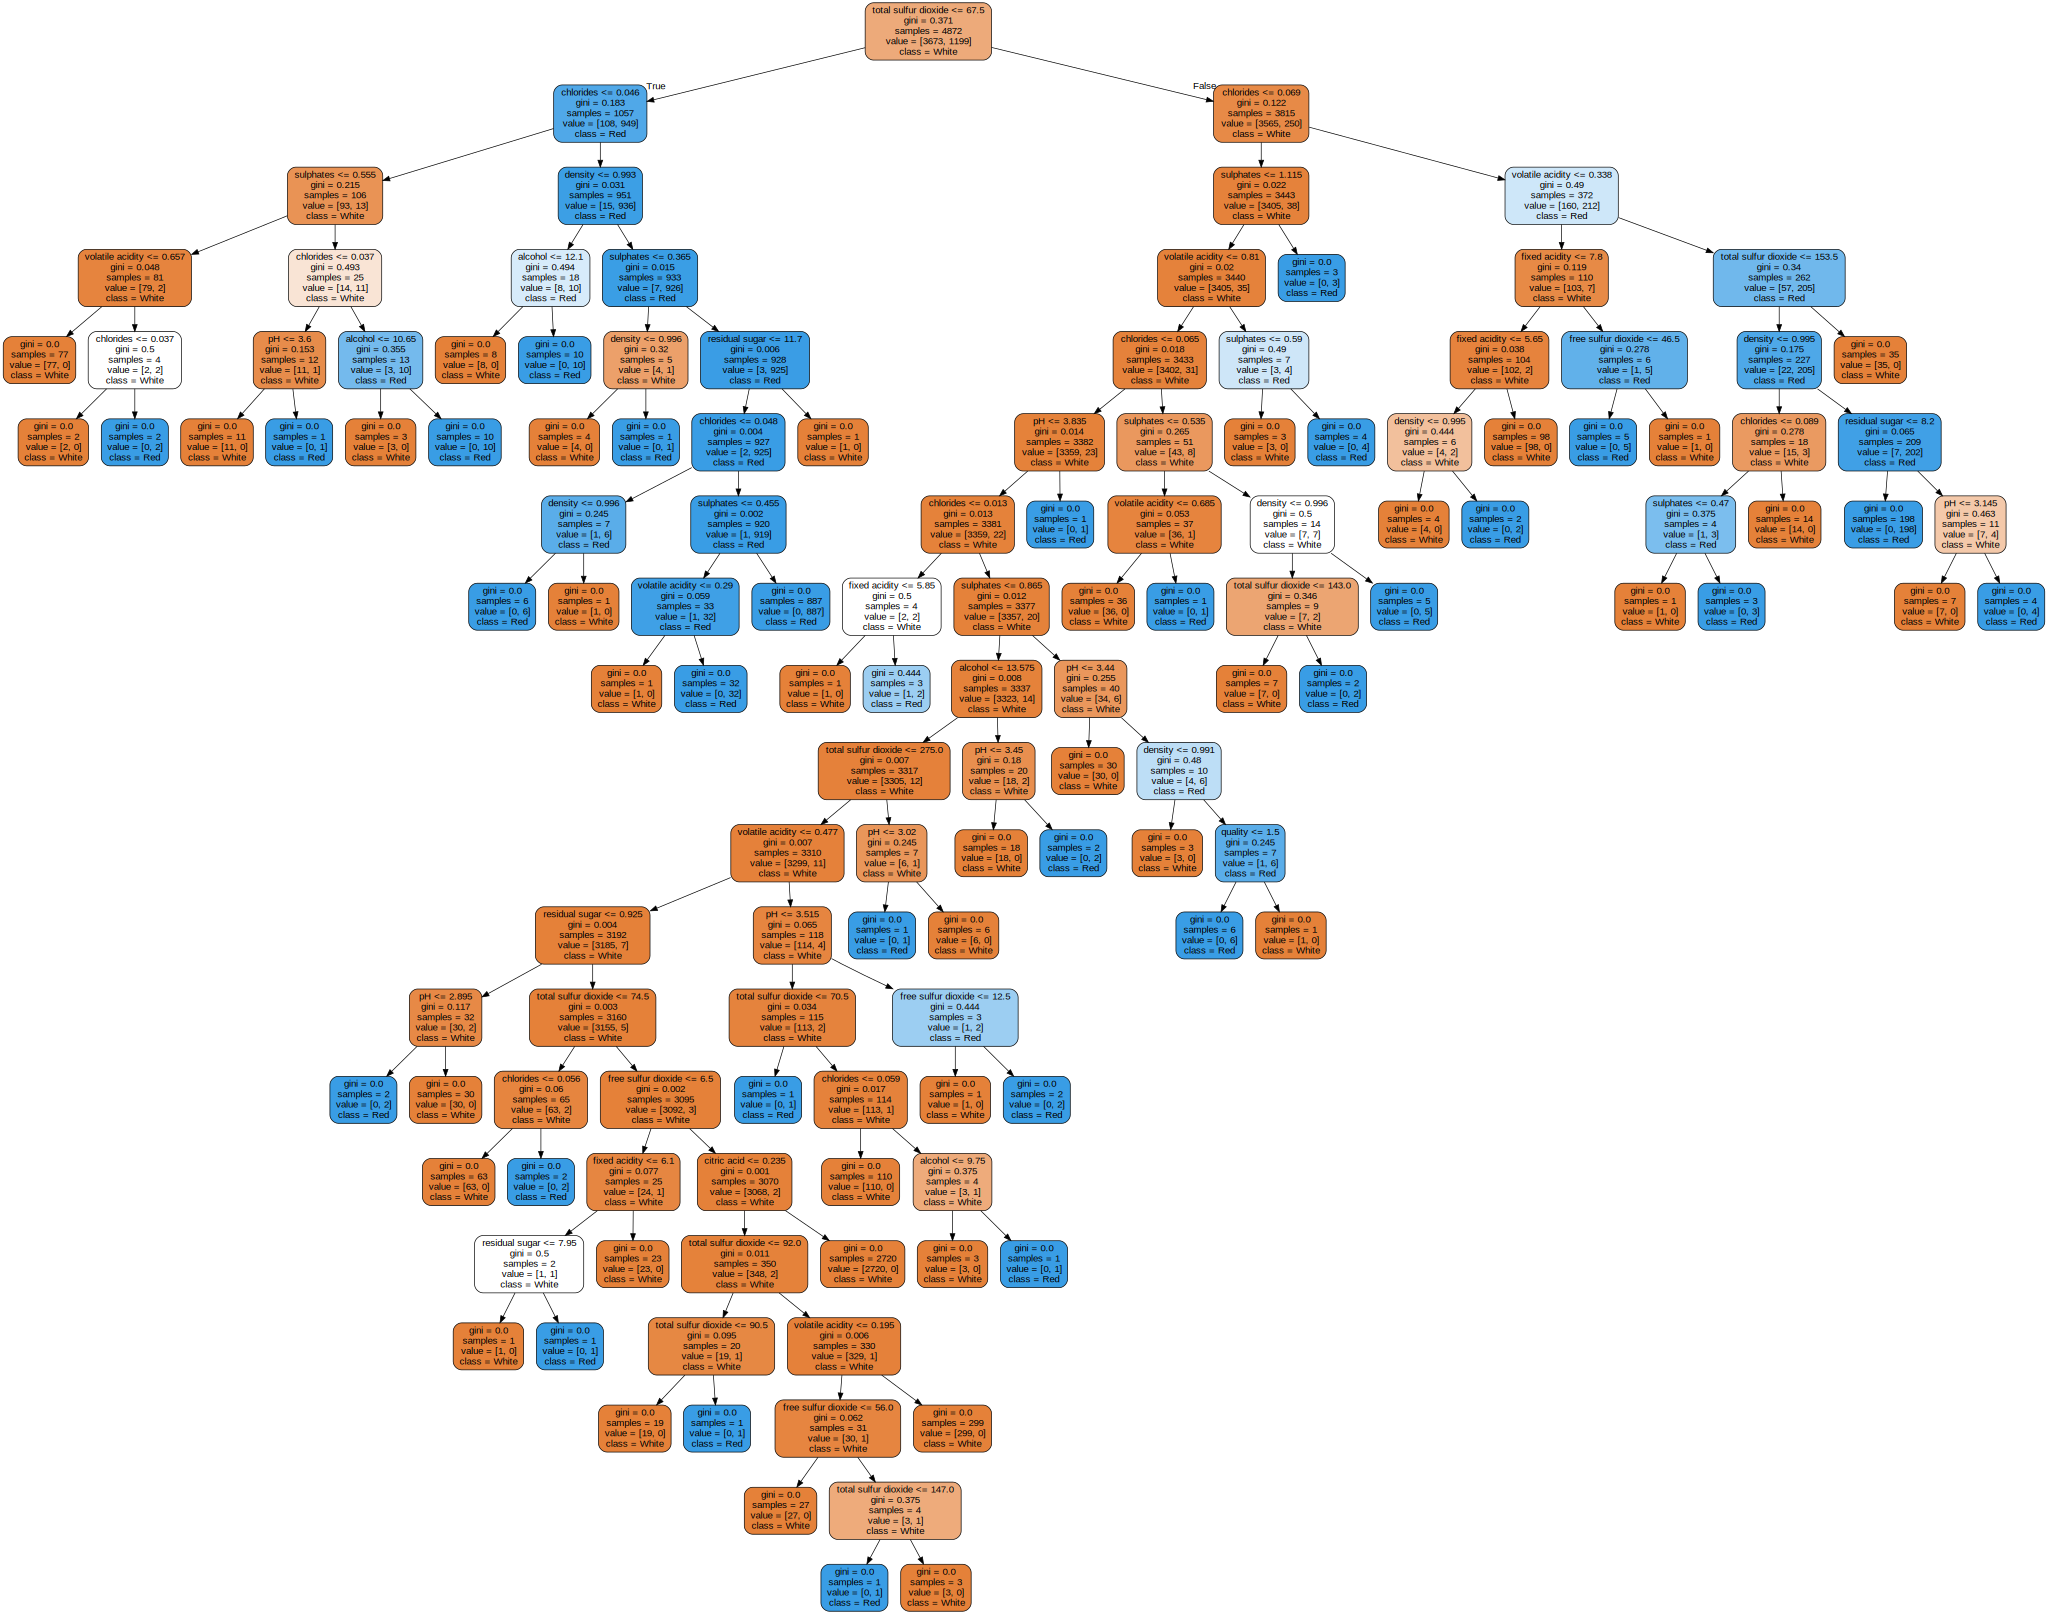

In [16]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree,
                               out_file = None,
                               feature_names = X_train.columns,
                               class_names = ['White', 'Red'],
                               filled = True,
                               rounded = True))
graph

In [17]:
# 0번 컬럼 중요도, 1번 컬럼 중요도...
# 각각 컬럼에 대한 중요도 조회
# 밑에 X_train columns의 각 컬럼에 대한 중요도
tree.feature_importances_.size

12

In [23]:
X_train.columns.size

12

### GridSerchCV 

In [18]:
params = {
    "max_depth": range(2, 15),
    "min_samples_leaf": [100, 500, 1000, 2000],
    "max_leaf_nodes": [5, 10, 20, 30]
}
tree = DecisionTreeClassifier(random_state = 1)

gs = GridSearchCV(tree,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 10,
                  n_jobs = -1)

In [19]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(2, 15),
                         'max_leaf_nodes': [5, 10, 20, 30],
                         'min_samples_leaf': [100, 500, 1000, 2000]},
             scoring='accuracy')

In [20]:
pred_train = gs.predict(X_train)
pred_test = gs.predict(X_test)

In [21]:
print(classification_report(y_train, pred_train ))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3673
           1       0.94      0.95      0.95      1199

    accuracy                           0.97      4872
   macro avg       0.96      0.97      0.96      4872
weighted avg       0.97      0.97      0.97      4872



In [22]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1225
           1       0.93      0.96      0.95       400

    accuracy                           0.97      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.97      0.97      0.97      1625



In [23]:
gs.best_params_

{'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 100}

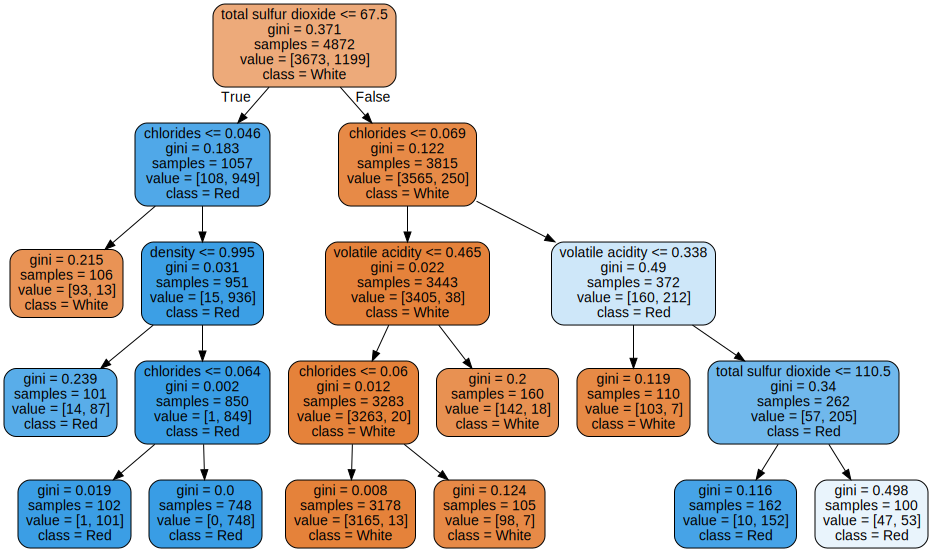

In [24]:
best_tree = gs.best_estimator_
graph = Source(export_graphviz(best_tree,
                               out_file = None,
                               feature_names = X_train.columns,
                               class_names = ['White', 'Red'],
                               rounded = True,
                               filled = True))
graph

### Feature(컬럼) 중요도 조회

In [29]:
# gs.feature_importances_
# 그리드 서치에는 feature_importances_가 없기 때문에 best_tree 통해 트리 모델로 변환
# fi: Feature importance
# feature importance 높을수록 좋음
best_tree = gs.best_estimator_
fi = best_tree.feature_importances_
fi

array([0.        , 0.05198967, 0.        , 0.        , 0.21920248,
       0.        , 0.72668479, 0.00212306, 0.        , 0.        ,
       0.        , 0.        ])

In [30]:
# fi_s: feature_importance_series
fi_s = pd.Series(fi, index = X_train.columns)
fi_s

fixed acidity           0.000000
volatile acidity        0.051990
citric acid             0.000000
residual sugar          0.000000
chlorides               0.219202
free sulfur dioxide     0.000000
total sulfur dioxide    0.726685
density                 0.002123
pH                      0.000000
sulphates               0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [32]:
fi_s.sort_values(ascending = False)

total sulfur dioxide    0.726685
chlorides               0.219202
volatile acidity        0.051990
density                 0.002123
fixed acidity           0.000000
citric acid             0.000000
residual sugar          0.000000
free sulfur dioxide     0.000000
pH                      0.000000
sulphates               0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

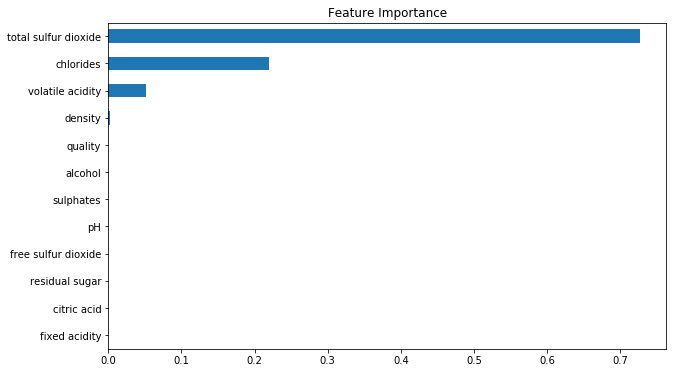

In [33]:
# feature_importance 그래프로 그리기
import matplotlib.pyplot as plt
fi_s.sort_values().plot(kind = 'barh', figsize = (10, 6))
plt.title("Feature Importance")
plt.show

In [ ]:
# 선형 모델일 경우, feature_Importance 높은 컬럼만 뽑아 Feature 구성
# SVM ,KNN
X[['total_sulfur_dioxide', 'chlorides', 'volatile_acidity', 'density']]

# 앙상블(Ensemble) 기법
- 하나의 모델만을 학습시켜 사용하지 않고, 여러 모델을 학습시켜 결합하는 방식으로 문제해결
- 개별로 학습한 여러 모델을 조합해 과적합을 막고 일반화 성능 향상시킬 수 있음
    - 과적합? 가지고 있는 데이터에 비해 복잡한(너무 성능이 좋은) 모델 가지고 있을 때 발생 
    - 개별 모델들의 성능이 떨어져, 과적합이 날 수 없음
    - 앙상블 기법에서는 과적합을 막기 위해 일부러 성능이 떨어지는 모델 넣음
- 개별 모델의 성능이 확보되지 않을 때, 성능향상에 도움될 수 있음

## 앙상블의 종류

### 1. 투표방식
- 여러 개의 추정기(Estimator)가 낸 결과들을 투표를 통해 최종 결과를 내는 방식
- 안에 있는 각각의 모델들이 독립적으로 학습, 예측. 서로간 영향 주지 않음
- 종류
    1. Bagging - 같은 유형의 알고리즘들을 조합하되 각각 학습 데이터 다르게 함 
        - ex) 랜덤포레스트: 트리 모델 사용
    2. Voting - 서로 다른 종류의 알고리즘들 결합
        - ex) Decision Tree, SVM, KNN을 섞어서 사용
    
### 2. 부스팅(Boosting)    
- 약한 학습기(Weak Learner)들을 결합해 정확하고 강력한 학습기(Strong Learner) 만듬
- 각 약한 학습기들은 순서대로 일하며, 뒤의 학습기들은 앞의 학습기가 찾지 못한 부분을 추가적으로 칮음
    - 이전 학습기 예측 결과의 오차 범위를 받아, 오차 범위 줄이는 방식으로 학습
- 협업 방식으로 직렬적(순차적)으로 일하며 보통 같은 모델 사용
    - ex) XGBoosting, Gridient Boosting: 트리 모델 사용

# Random Forest (랜덤포레스트)
- Bagging 방식의 앙상블 모델
- Decision Tree를 기반으로 함(동일한 하이퍼파라미터)
- 학습 데이터를 랜덤한 방식으로 변경한 후, 모델에 전달해 학습
- Forest는 모델과 관련, Random은 데이터와 관련

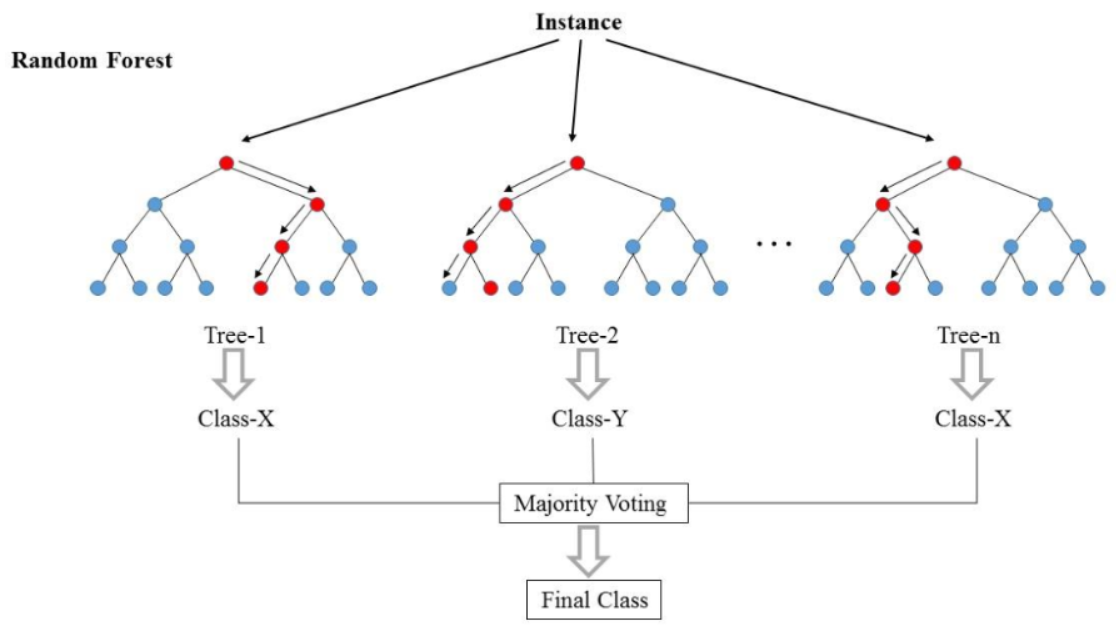

- 다수의 결정트리 사용해 성능을 올린 앙상블 알고리즘
    - 학습데이터(X_train, y_train)를 샘플링(전체 중 일부만 뽑음)해서 다수의 결정트리를 생성하고, 이를 기반으로 다수결로 결과 결정하는 방식
    - 다수의 결정트리를 만들기에 랜덤'포레스트'라고 부름
- 처리속도가 빠르며, 분류 성능도 높은 모델로 알려져 있음(회귀 모델에서도 사용 가능) 
- 랜덤포레스트의 절차
    - 결정트리의 개수를 하이퍼파라미터로 받음(default: 100개, 최소 200개) 
    - 랜덤 포레스트를 구성하는 모든 결정트리가 서로 다르도록 만듬
        - 각 트리는 **부트스트랩 샘플링**(중복 허용하면서 랜덤하게 샘플링). 각 트리의 총 데이터 수는 원래 데이터셋과 동일하지만 일부는 누락되고 일부는 중복됨
        - ex) 데이터 개수가 3000개이고 A, B, C, 3개의 트리가 있을 때 각 3000개의 데이터로 학습. A 트리의 경우 3000개 중 1000개의 데이터를 가지고 1000개의 데이터를 3000개로 늘림. 나머지 2000개를 기존 1000개와 중복되게 만듬
        - 각 트리는 **전체 피처 중 일부 피처만** 랜덤하게 가지게 됨
    - 각 트리별로 예측결과를 내고 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과 냄 
    - 회귀의 경우, 예측 결과의 평균을 냄

- **주요 하이퍼파라미터**
    - n_estimators
        - tree의 개수
        - 시간과 메모리가 허용하는 범위에서 클수록 좋음(최소 200개 이상)
    - max_features
        - 각 트리에서 선택할 feature의 개수(컬럼 sampling)
        - 클수록 각 트리간의 feature 차이가 없어지고, 작을수록 차이가 많이 나게 됨
    - max_depth, min_samples_leaf, ..
        - DecisionTreeClassifier의 하이퍼파라미터들
        - 트리의 최대 깊이, 가지를 치기 위한 최소 샘플 수 등 결정 트리에서 과적합을 막기 위한 파라미터들을 랜덤 포레스트에 적용 가능

### 와인 데이터셋

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
X_train.shape

(4872, 12)

In [37]:
# 랜덤포레스트 모델의 각 트리가 부트스트랩 방식으로 형성된 4872개의 서로 다른 데이터로 학습 
rf = RandomForestClassifier(n_estimators = 200,  # DecisionTree 개수
                            max_features = 7,  # 각각의 tree 학습시 전달할 feature(컬럼)의 개수
                            max_depth = 5,
                            n_jobs = -1,
                            random_state = 1)

In [38]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=200, n_jobs=-1,
                       random_state=1)

In [39]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

In [40]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9938423645320197, 0.9938461538461538)

### feature 중요도

In [41]:
# fi - feature importance
# 200개 DecisionTree의 결과 취합
fi = rf.feature_importances_
fi

array([1.65418896e-02, 8.40754057e-02, 4.25475173e-03, 1.28155074e-02,
       3.45672515e-01, 1.17123357e-02, 4.50963234e-01, 3.32660368e-02,
       1.08354032e-02, 2.67077297e-02, 2.89863770e-03, 2.56553405e-04])

In [ ]:
# Feature importance 그래프로 그리기
fi_s = pd.Series(fi, index = X_train.columns)
fi_s.sort_values(ascending = False)

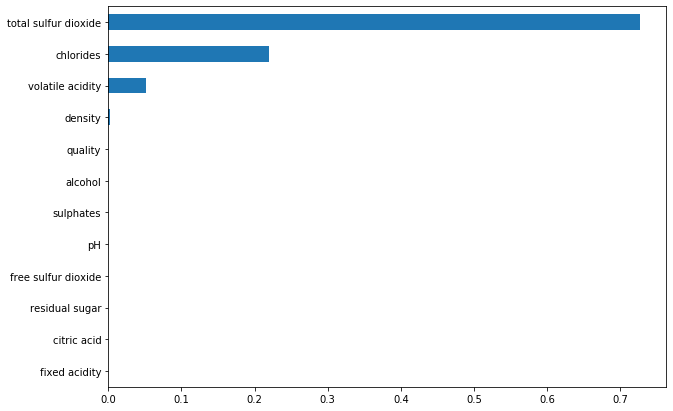

In [43]:
# 시각화 - 그래프
# feature_importance가 가장 낮은 컬럼을 순차적으로 하나씩 제거하면서도 예측율 높일 수 있음
fi_s.sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.show()

## TODO 위스콘신 유방암 데이터셋

### 데이터셋 로드

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
X, y = load_breast_cancer(return_X_y = True)
X.shape, y.shape

((569, 30), (569,))

### train, test 셋 분리

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

In [47]:
y_train.shape, y_test.shape

((426,), (143,))

### 모델(Random Forest) 생성 및 학습

In [48]:
rf = RandomForestClassifier(n_estimators = 200,
                            max_features = 15,
                            max_depth = 5,
                            n_jobs = -1,
                            random_state = 1)

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=15, n_estimators=200,
                       n_jobs=-1, random_state=1)

### 검증 - 정확도

In [50]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

In [51]:
# 과대적합됨 -> 하이퍼 파라미터 수정
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9976525821596244, 0.951048951048951)

### 특성 중요도 (Feature importance) 조회 및 시각화

In [52]:
fi = rf.feature_importances_
print(fi)

[0.00463955 0.01384115 0.00379319 0.01078856 0.00189817 0.00304166
 0.02963914 0.11022216 0.0018731  0.00176271 0.00509571 0.0031751
 0.0031342  0.01818324 0.0031701  0.00189934 0.00247902 0.00220542
 0.00237803 0.00454188 0.11275583 0.02374541 0.20790111 0.13835278
 0.00696561 0.00800956 0.01499553 0.25203332 0.00509586 0.00238357]


In [54]:
d = load_breast_cancer()

In [57]:
fi_s = pd.Series(fi, index = d['feature_names']).sort_values(ascending = False)
fi_s

worst concave points       0.252033
worst perimeter            0.207901
worst area                 0.138353
worst radius               0.112756
mean concave points        0.110222
mean concavity             0.029639
worst texture              0.023745
area error                 0.018183
worst concavity            0.014996
mean texture               0.013841
mean area                  0.010789
worst compactness          0.008010
worst smoothness           0.006966
worst symmetry             0.005096
radius error               0.005096
mean radius                0.004640
fractal dimension error    0.004542
mean perimeter             0.003793
texture error              0.003175
smoothness error           0.003170
perimeter error            0.003134
mean compactness           0.003042
concavity error            0.002479
worst fractal dimension    0.002384
symmetry error             0.002378
concave points error       0.002205
compactness error          0.001899
mean smoothness            0

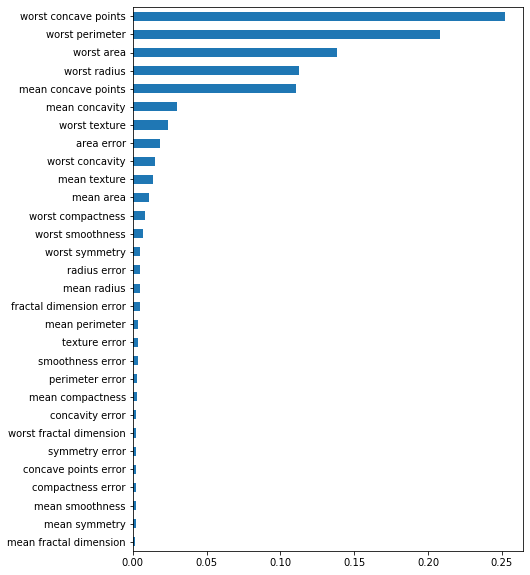

In [60]:
# 그래프 그리기
fi_s.sort_values().plot(kind = 'barh', figsize = (7, 10))
plt.show()